# **STAGE 1**

## Understanding The Dataset



*   Dataset berisi kumpulan data tentang rincian pelanggan Bank yang mencerminkan fakta apakah pelanggan akan meninggalkan Bank ( menutup rekeningnya ) atau terus menjadi pelanggan.
*   Dataset memperlihatkan 10000 data pelanggan dengan rentang umur 18 sampai 92 tahun.
*   Rentang waktu pelanggan antara 1 sampai 10 tahun menggunakan Bank tersebut.
*   Pelanggan berasal dari kota Perancis, Jerman dan Spanyol.
*   Sebanyak 70% pelanggan adalah pengguna credit card dan sebanyak 51% pelanggan adalah Pelangan dengan kategori aktif.

# **STAGE 2**




## Identify Which Activities Should be Done




*   Melakukan eksplorasi data analisis dan Data Visualisasi.
*   Melakukan Pra-Proses Data
*   Membuat Model Machine Learning







# **STAGE 3**

In [ ]:
# Import All Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## **Exploratory Data Analysis and Data Visualization**

In [ ]:
churn = pd.read_csv('https://raw.githubusercontent.com/maulanadiooo/digitalskola/main/Churn_Modelling.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
print('Shape:',churn.shape)
print('\n Missing Value : \n',churn.isna().sum())
print('\n Data Describe : \n',churn.describe())

Shape: (10000, 14)

 Missing Value : 
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

 Data Describe : 
          RowNumber    CustomerId  ...  EstimatedSalary        Exited
count  10000.00000  1.000000e+04  ...     10000.000000  10000.000000
mean    5000.50000  1.569094e+07  ...    100090.239881      0.203700
std     2886.89568  7.193619e+04  ...     57510.492818      0.402769
min        1.00000  1.556570e+07  ...        11.580000      0.000000
25%     2500.75000  1.562853e+07  ...     51002.110000      0.000000
50%     5000.50000  1.569074e+07  ...    100193.915000      0.000000
75%     7500.25000  1.575323e+07  ...    149388.247500      0.000000
max    10000.00000  1.581569e+07  ...    199992.480000      1.000000

[8 rows x 11

In [ ]:
## Drop Duplicate Data
churn.drop_duplicates(inplace= True)
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Drop column yang tidak digunakan
churn = churn.drop(['CustomerId','Surname','RowNumber'], axis= 1)
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## **Visualization**

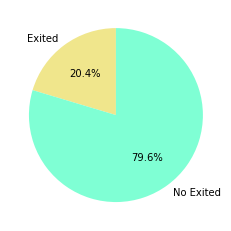

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
Keluar = churn[churn['Exited'] == 1].count()
Bertahan = churn[churn['Exited'] == 0].count()

y = np.array([Keluar['Exited'], Bertahan['Exited']])
mylabels = ["Exited", "No Exited"]

plt.pie(y, autopct='%.1f%%', labels = mylabels, startangle = 90,colors=['khaki','aquamarine'])
plt.show() 

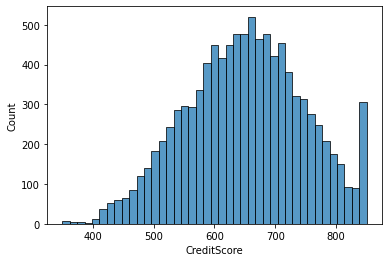

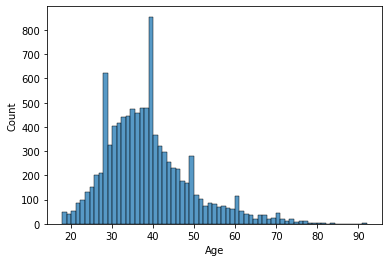

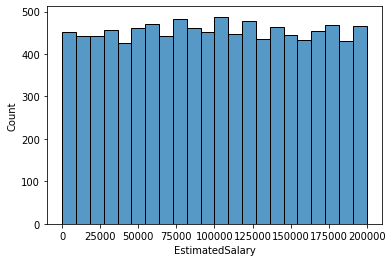

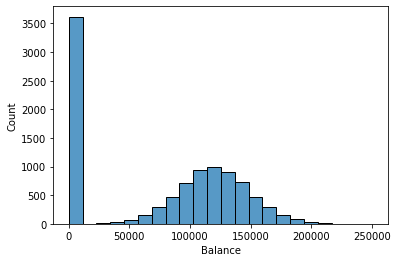

In [ ]:
#data distribution

sns.histplot(churn['CreditScore'])
plt.show()
print('\n')
sns.histplot(churn['Age'])
plt.show()
print('\n')
sns.histplot(churn['EstimatedSalary'])
plt.show()
print('\n')
sns.histplot(churn['Balance'])
plt.show()

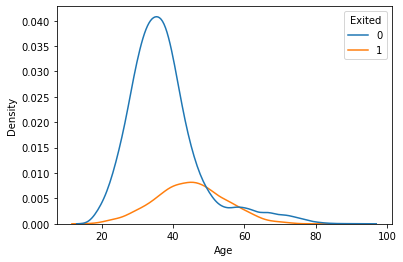

In [ ]:
sns.kdeplot(data=churn, x='Age', hue='Exited')

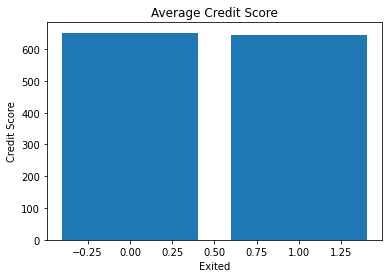

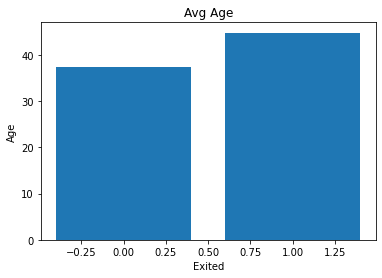

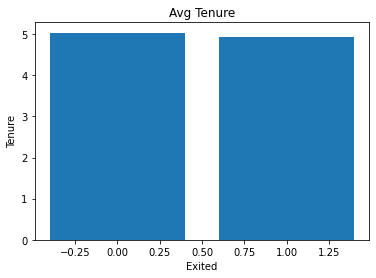

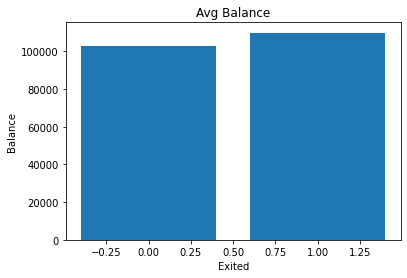

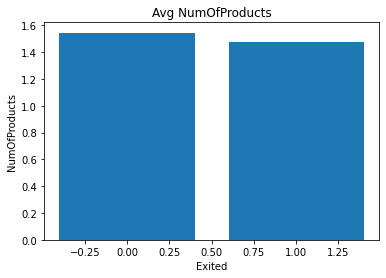

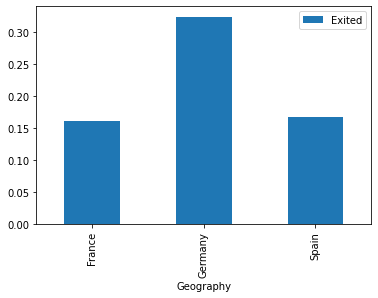

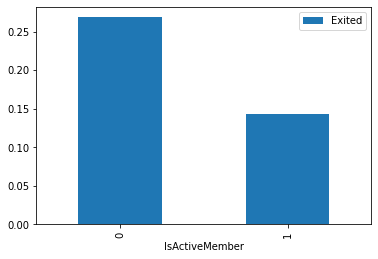

In [ ]:
#pivoting and visualization

avg_cs = pd.pivot_table(churn,index=["Exited"],aggfunc=np.average, values=['CreditScore'])
avg_cs.reset_index(inplace=True)
avg_cs
plt.bar(avg_cs['Exited'],avg_cs['CreditScore'])
plt.title('Average Credit Score')
plt.xlabel('Exited')
plt.ylabel('Credit Score')

plt.show()

print('\n')

average_Age = pd.pivot_table(churn,index=["Exited"],aggfunc=np.average, values=['Age'])
average_Age.reset_index(inplace=True)
plt.bar(average_Age['Exited'],average_Age['Age'])
plt.title('Avg Age')
plt.xlabel('Exited')
plt.ylabel('Age')

plt.show()

print('\n')

average_Tenure = pd.pivot_table(churn,index=["Exited"],aggfunc=np.average, values=['Tenure'])
average_Tenure.reset_index(inplace=True)
plt.bar(average_Tenure['Exited'],average_Tenure['Tenure'])
plt.title('Avg Tenure')
plt.xlabel('Exited')
plt.ylabel('Tenure')

plt.show()

print('\n')

average_balance = pd.pivot_table(churn,index=["Exited"],aggfunc=np.average, values=['Balance'])
average_balance.reset_index(inplace=True)
plt.bar(average_balance['Exited'],average_balance['Balance'])
plt.title('Avg Balance')
plt.xlabel('Exited')
plt.ylabel('Balance')

plt.show()

print('\n')

avg_NumOfProducts = pd.pivot_table(churn,index=["Exited"],aggfunc=np.average, values=['NumOfProducts'])
avg_NumOfProducts.reset_index(inplace=True)
plt.bar(avg_NumOfProducts['Exited'],avg_NumOfProducts['NumOfProducts'])
plt.title('Avg NumOfProducts')
plt.xlabel('Exited')
plt.ylabel('NumOfProducts')

plt.show()

print('\n')

avg_2 = pd.pivot_table(churn,index=["Geography"],aggfunc=np.average, values=['Exited'])
avg_2.reset_index(inplace=True)
avg_2.plot(x='Geography',y='Exited',kind='bar')
plt.show()

print('\n')

avg_act = pd.pivot_table(churn,index=["IsActiveMember"],aggfunc=np.average, values=['Exited'])
avg_act.reset_index(inplace=True)
avg_act.plot(x='IsActiveMember',y='Exited',kind='bar')
plt.show()

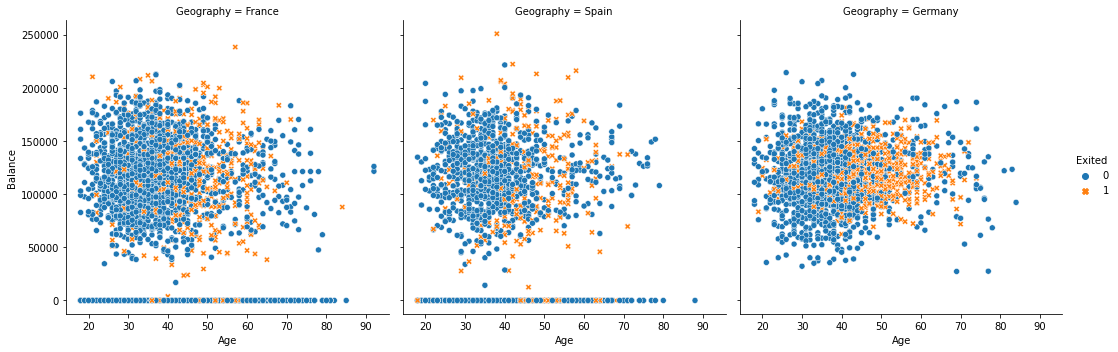

In [ ]:
sns.relplot(data= churn, x= 'Age', y='Balance', col= 'Geography', style= 'Exited', hue= 'Exited')

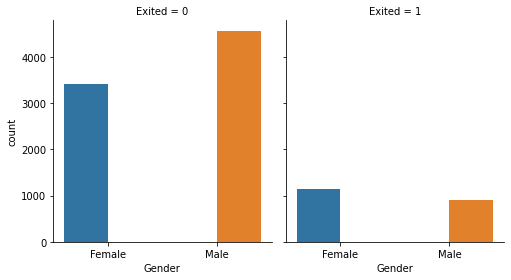

In [ ]:
sns.catplot(data=churn,x='Gender',hue='Gender',col= 'Exited',kind='count', height= 4, aspect= .9)

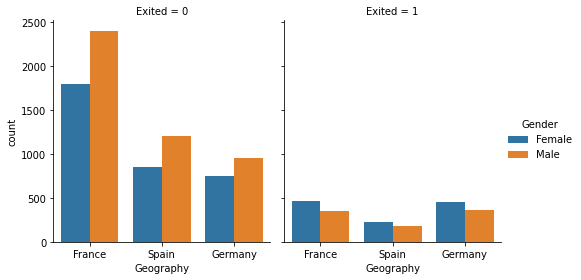

In [ ]:
sns.catplot(data=churn,x='Geography',hue='Gender',col= 'Exited',kind='count', height= 4, aspect= .9)

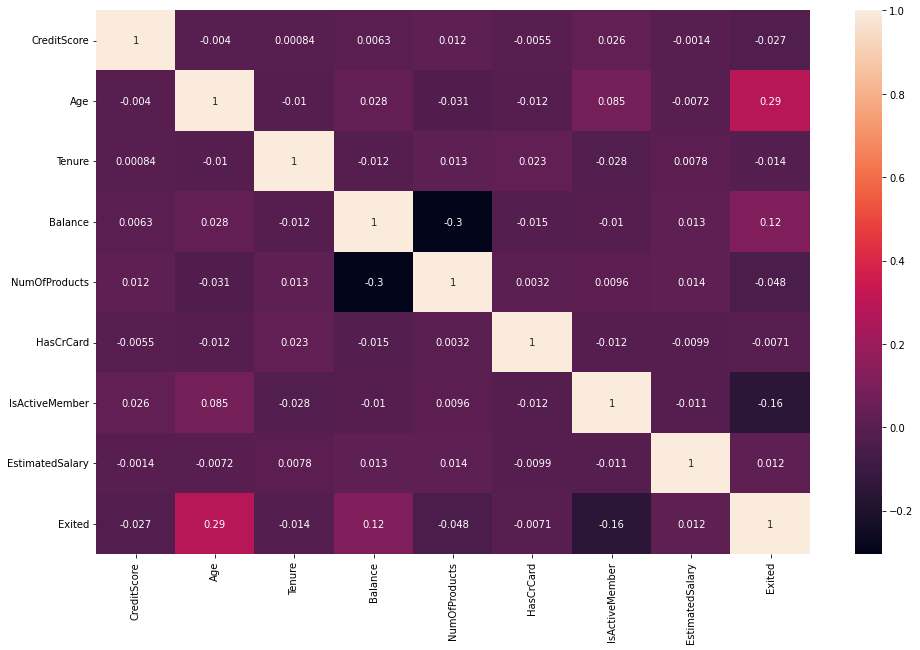

In [ ]:
a = churn.corr()
plt.figure(figsize=(16,10))
sns.heatmap(a, annot=True)

# **STAGE 4**

## **Data Preprocessing**

In [ ]:
Counter(churn['Geography'])

Counter({'France': 5014, 'Germany': 2509, 'Spain': 2477})

In [ ]:
df_2 = churn[["Geography", 'Balance']]
df_2.head()

,Geography,Balance
0,France,0.00
1,Spain,83807.86
2,France,159660.80
3,France,0.00
4,Spain,125510.82


In [ ]:
#onehot geography berdasarkan mean dari Age dan balance
dataset = pd.pivot_table(churn,index=["Geography"],aggfunc=[np.mean], values=['Age','Balance'])
dataset.reset_index(inplace=True)
dataset

Geography       mean               
                   Age        Balance
0    France  38.511767   62092.636516
1   Germany  39.771622  119730.116134
2     Spain  38.890997   61818.147763

In [ ]:
#check count of balance with 0 value
churn[churn['Balance'] == 0].value_counts()

CreditScore  Geography  Gender  Age  Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
850          Spain      Male    62   5       0.0      2              1          1               180243.56        0         1
604          Spain      Female  71   10      0.0      2              1          1               129984.20        0         1
606          Spain      Male    35   7       0.0      1              1          0               106837.06        1         1
                                33   8       0.0      2              1          1               63176.77         0         1
                        Female  46   8       0.0      2              1          1               183717.94        0         1
                                                                                                                          ..
693          Spain      Female  45   4       0.0      2              1          1               26589.56         0         1
     

In [ ]:
#replace 0 value with mean
churn['Balance'].replace(0, churn['Balance'].mean(), inplace=True)
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,76485.889288,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,699,France,Female,39,1,76485.889288,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0


In [ ]:
#merge onehot encoding georaphy berdasarkan Age,Balance dengan tabel churn
mergeDataset = pd.merge(churn,dataset, how='left', on='Geography')
mergeDataset

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,"(mean, Age)","(mean, Balance)"
0,619,France,Female,42,2,76485.889288,1,1,1,101348.88,1,38.511767,62092.636516
1,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0,38.890997,61818.147763
2,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1,38.511767,62092.636516
3,699,France,Female,39,1,76485.889288,2,0,0,93826.63,0,38.511767,62092.636516
4,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0,38.890997,61818.147763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,76485.889288,2,1,0,96270.64,0,38.511767,62092.636516
9996,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0,38.511767,62092.636516
9997,709,France,Female,36,7,76485.889288,1,0,1,42085.58,1,38.511767,62092.636516
9998,772,Germany,Male,42,3,75075.310000,2,1,0,92888.52,1,39.771622,119730.116134


In [ ]:
#drop column geography
mergeDataset.drop(['Geography'], axis=1, inplace=True)
mergeDataset

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,"(mean, Age)","(mean, Balance)"
0,619,Female,42,2,76485.889288,1,1,1,101348.88,1,38.511767,62092.636516
1,608,Female,41,1,83807.860000,1,0,1,112542.58,0,38.890997,61818.147763
2,502,Female,42,8,159660.800000,3,1,0,113931.57,1,38.511767,62092.636516
3,699,Female,39,1,76485.889288,2,0,0,93826.63,0,38.511767,62092.636516
4,850,Female,43,2,125510.820000,1,1,1,79084.10,0,38.890997,61818.147763
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,76485.889288,2,1,0,96270.64,0,38.511767,62092.636516
9996,516,Male,35,10,57369.610000,1,1,1,101699.77,0,38.511767,62092.636516
9997,709,Female,36,7,76485.889288,1,0,1,42085.58,1,38.511767,62092.636516
9998,772,Male,42,3,75075.310000,2,1,0,92888.52,1,39.771622,119730.116134


In [ ]:
#step to change column with tuple to string
satu = mergeDataset.drop(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'], axis=1)
satu.rename(columns='_'.join, inplace=True)
satu.reset_index(inplace=True)
satu

,index,mean_Age,mean_Balance
0,0,38.511767,62092.636516
1,1,38.890997,61818.147763
2,2,38.511767,62092.636516
3,3,38.511767,62092.636516
4,4,38.890997,61818.147763
...,...,...,...
9995,9995,38.511767,62092.636516
9996,9996,38.511767,62092.636516
9997,9997,38.511767,62092.636516
9998,9998,39.771622,119730.116134


In [ ]:
#reset index dataset Churn agar bisa di merge dengan variable satu
churn.reset_index(inplace=True)
churn

,index,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,619,France,Female,42,2,76485.889288,1,1,1,101348.88,1
1,1,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,2,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,3,699,France,Female,39,1,76485.889288,2,0,0,93826.63,0
4,4,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,771,France,Male,39,5,76485.889288,2,1,0,96270.64,0
9996,9996,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0
9997,9997,709,France,Female,36,7,76485.889288,1,0,1,42085.58,1
9998,9998,772,Germany,Male,42,3,75075.310000,2,1,0,92888.52,1


In [ ]:
hasilmerge = pd.merge(churn,satu, how='left', on='index')
hasilmerge

,index,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,mean_Age,mean_Balance
0,0,619,France,Female,42,2,76485.889288,1,1,1,101348.88,1,38.511767,62092.636516
1,1,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0,38.890997,61818.147763
2,2,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1,38.511767,62092.636516
3,3,699,France,Female,39,1,76485.889288,2,0,0,93826.63,0,38.511767,62092.636516
4,4,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0,38.890997,61818.147763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,771,France,Male,39,5,76485.889288,2,1,0,96270.64,0,38.511767,62092.636516
9996,9996,516,France,Male,35,10,57369.610000,1,1,1,101699.77,0,38.511767,62092.636516
9997,9997,709,France,Female,36,7,76485.889288,1,0,1,42085.58,1,38.511767,62092.636516
9998,9998,772,Germany,Male,42,3,75075.310000,2,1,0,92888.52,1,39.771622,119730.116134


In [ ]:
mergeDataset = pd.get_dummies(hasilmerge, columns=['Gender'], drop_first=True)
mergeDataset.drop(['Geography', 'index'], axis=1, inplace=True)
mergeDataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,mean_Age,mean_Balance,Gender_Male
0,619,42,2,76485.889288,1,1,1,101348.88,1,38.511767,62092.636516,0
1,608,41,1,83807.860000,1,0,1,112542.58,0,38.890997,61818.147763,0
2,502,42,8,159660.800000,3,1,0,113931.57,1,38.511767,62092.636516,0
3,699,39,1,76485.889288,2,0,0,93826.63,0,38.511767,62092.636516,0
4,850,43,2,125510.820000,1,1,1,79084.10,0,38.890997,61818.147763,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,76485.889288,2,1,0,96270.64,0,38.511767,62092.636516,1
9996,516,35,10,57369.610000,1,1,1,101699.77,0,38.511767,62092.636516,1
9997,709,36,7,76485.889288,1,0,1,42085.58,1,38.511767,62092.636516,0
9998,772,42,3,75075.310000,2,1,0,92888.52,1,39.771622,119730.116134,1


## **Check Outlier**

In [ ]:
# Inter-Quantile Range
Q1 = mergeDataset["CreditScore"].quantile(q = 0.25)
Q3 = mergeDataset["CreditScore"].quantile(q = 0.75)

IQR = Q3 - Q1
# Outlier
upper_inner_fence = Q3 + 1.5 * IQR
lower_inner_fence = Q1 - 1.5 * IQR
print("Above upper outer fence:")
mergeDataset["CreditScore"][mergeDataset["CreditScore"] > upper_inner_fence]
print("Below lower inner fence:")
mergeDataset["CreditScore"][mergeDataset["CreditScore"] < lower_inner_fence]

Above upper outer fence:
Below lower inner fence:


7       376
942     376
1193    363
1405    359
1631    350
1838    350
1962    358
2473    351
2579    365
8154    367
8723    350
8762    350
9210    382
9356    373
9624    350
Name: CreditScore, dtype: int64

In [ ]:
# change value of creditscore outlier with creditscore mean
for i in mergeDataset["CreditScore"][mergeDataset["CreditScore"] < lower_inner_fence]:
  mergeDataset['CreditScore'].replace(i, mergeDataset['CreditScore'].mean(), inplace=True)

mergeDataset['CreditScore'][mergeDataset["CreditScore"] < lower_inner_fence]

Series([], Name: CreditScore, dtype: float64)

In [ ]:
# Inter-Quantile Range
Q1 = mergeDataset["Balance"].quantile(q = 0.25)
Q3 = mergeDataset["Balance"].quantile(q = 0.75)

IQR = Q3 - Q1
# Outlier
upper_inner_fence = Q3 + 1.5 * IQR
lower_inner_fence = Q1 - 1.5 * IQR
print("Above upper outer fence:")
mergeDataset["Balance"][mergeDataset["Balance"] > upper_inner_fence]
print("Below lower inner fence:")
mergeDataset["Balance"][mergeDataset["Balance"] < lower_inner_fence]

Above upper outer fence:
Below lower inner fence:


Series([], Name: Balance, dtype: float64)

In [ ]:
# Inter-Quantile Range
Q1 = mergeDataset["Age"].quantile(q = 0.25)
Q3 = mergeDataset["Age"].quantile(q = 0.75)

IQR = Q3 - Q1
# Outlier
upper_inner_fence = Q3 + 1.5 * IQR
lower_inner_fence = Q1 - 1.5 * IQR
print("Above upper outer fence:")
mergeDataset["Age"][mergeDataset["Age"] > upper_inner_fence]
print("Below lower inner fence:")
mergeDataset["Age"][mergeDataset["Age"] < lower_inner_fence]

Above upper outer fence:
Below lower inner fence:


Series([], Name: Age, dtype: int64)

In [ ]:
# Inter-Quantile Range
Q1 = mergeDataset["Tenure"].quantile(q = 0.25)
Q3 = mergeDataset["Tenure"].quantile(q = 0.75)

IQR = Q3 - Q1
# Outlier
upper_inner_fence = Q3 + 1.5 * IQR
lower_inner_fence = Q1 - 1.5 * IQR
print("Above upper outer fence:")
mergeDataset["Tenure"][mergeDataset["Tenure"] > upper_inner_fence]
print("Below lower inner fence:")
mergeDataset["Tenure"][mergeDataset["Tenure"] < lower_inner_fence]

Above upper outer fence:
Below lower inner fence:


Series([], Name: Tenure, dtype: int64)

In [ ]:
# Inter-Quantile Range
Q1 = mergeDataset["EstimatedSalary"].quantile(q = 0.25)
Q3 = mergeDataset["EstimatedSalary"].quantile(q = 0.75)

IQR = Q3 - Q1
# Outlier
upper_inner_fence = Q3 + 1.5 * IQR
lower_inner_fence = Q1 - 1.5 * IQR
print("Above upper outer fence:")
mergeDataset["EstimatedSalary"][mergeDataset["EstimatedSalary"] > upper_inner_fence]
print("Below lower inner fence:")
mergeDataset["EstimatedSalary"][mergeDataset["EstimatedSalary"] < lower_inner_fence]

Above upper outer fence:
Below lower inner fence:


Series([], Name: EstimatedSalary, dtype: float64)

In [ ]:
# Inter-Quantile Range
Q1 = mergeDataset["NumOfProducts"].quantile(q = 0.25)
Q3 = mergeDataset["NumOfProducts"].quantile(q = 0.75)

IQR = Q3 - Q1
# Outlier
upper_inner_fence = Q3 + 1.5 * IQR
lower_inner_fence = Q1 - 1.5 * IQR


print("Above upper outer fence:")
mergeDataset["NumOfProducts"][mergeDataset["NumOfProducts"] > upper_inner_fence]
print("Below lower inner fence:")
mergeDataset["NumOfProducts"][mergeDataset["NumOfProducts"] < lower_inner_fence]

Above upper outer fence:
Below lower inner fence:


Series([], Name: NumOfProducts, dtype: int64)

## **Final dataset**

In [ ]:
mergeDataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,mean_Age,mean_Balance,Gender_Male
0,619.0,42,2,76485.889288,1,1,1,101348.88,1,38.511767,62092.636516,0
1,608.0,41,1,83807.860000,1,0,1,112542.58,0,38.890997,61818.147763,0
2,502.0,42,8,159660.800000,3,1,0,113931.57,1,38.511767,62092.636516,0
3,699.0,39,1,76485.889288,2,0,0,93826.63,0,38.511767,62092.636516,0
4,850.0,43,2,125510.820000,1,1,1,79084.10,0,38.890997,61818.147763,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,39,5,76485.889288,2,1,0,96270.64,0,38.511767,62092.636516,1
9996,516.0,35,10,57369.610000,1,1,1,101699.77,0,38.511767,62092.636516,1
9997,709.0,36,7,76485.889288,1,0,1,42085.58,1,38.511767,62092.636516,0
9998,772.0,42,3,75075.310000,2,1,0,92888.52,1,39.771622,119730.116134,1


In [ ]:
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
    precision = round((tp) / (tp+fp) * 100, 2)
    recall = round((tp) / (tp+fn) * 100, 2)
    specificity = round((tn) / (tn+fp) * 100, 2)
    npv = round((tn) / (tn+fn) * 100, 2)
    fscore = round((2 * precision * recall)/ (precision + recall),2)
    
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('Specificity:', specificity, '%')
    print('NPV        :', npv, '%')
    print('F-Score    :', fscore, '%')


In [ ]:
X = mergeDataset.drop(['Exited', 'CreditScore'], axis=1)
y = mergeDataset['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=27)

In [ ]:
Counter(y_train)

Counter({0: 5574, 1: 1426})

## **Balancing Dataset Train**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler(sampling_strategy=0.8)
X_train, y_train = undersampling.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Counter(y_train)

Counter({0: 1782, 1: 1426})

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 1)
X_train, y_train = smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Counter(y_train)

Counter({0: 1782, 1: 1782})

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
X_train.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,mean_Age,mean_Balance,Gender_Male
0,-0.671033,0.359252,0.476912,0.757760,0.65373,-0.917529,-0.263306,-0.187181,-0.684717,0.996965
1,-0.671033,-1.404312,-0.085645,-0.799446,0.65373,1.121433,-0.201107,-0.880313,-0.674479,0.996965
2,-0.195915,0.711965,-1.425542,-0.799446,0.65373,-0.917529,1.194990,1.422369,1.475275,0.996965
3,0.374228,1.417390,-0.918505,0.757760,0.65373,1.121433,-0.083519,-0.880313,-0.674479,0.996965
4,-1.241175,-1.051600,0.102005,-0.799446,0.65373,1.121433,-0.741124,-0.880313,-0.674479,0.996965


# **STAGE 5**

## **Develope Model**

## **KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [ ]:
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [ ]:
classification_eval(y_train, y_train_knn, 'KNN Training Perf.')

Evaluation Model: KNN Training Perf.
[[1424  358]
 [ 403 1379]]
Accuracy   : 78.65 %
Precision  : 79.39 %
Recall     : 77.38 %
Specificity: 79.91 %
NPV        : 77.94 %
F-Score    : 78.37 %


In [ ]:
classification_eval(y_test, y_test_knn, 'KNN Testing Perf.')

Evaluation Model: KNN Testing Perf.
[[1827  562]
 [ 174  437]]
Accuracy   : 75.47 %
Precision  : 43.74 %
Recall     : 71.52 %
Specificity: 76.48 %
NPV        : 91.3 %
F-Score    : 54.28 %


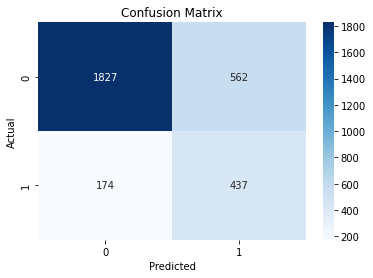

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_knn)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted');ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
plt.show()

## **Random Forest**

In [ ]:
ranfor = RandomForestClassifier(max_depth=8,random_state=27)
ranfor.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=27, verbose=0,
                       warm_start=False)

In [ ]:
y_train_ranfor = ranfor.predict(X_train)
y_test_ranfor = ranfor.predict(X_test)

In [ ]:
classification_eval(y_train, y_train_ranfor, 'Ranfor Training Perf.')

Evaluation Model: Ranfor Training Perf.
[[1592  190]
 [ 299 1483]]
Accuracy   : 86.28 %
Precision  : 88.64 %
Recall     : 83.22 %
Specificity: 89.34 %
NPV        : 84.19 %
F-Score    : 85.84 %


In [ ]:
classification_eval(y_test, y_test_ranfor, 'Ranfor Testing Perf.')

Evaluation Model: Ranfor Testing Perf.
[[1981  408]
 [ 163  448]]
Accuracy   : 80.97 %
Precision  : 52.34 %
Recall     : 73.32 %
Specificity: 82.92 %
NPV        : 92.4 %
F-Score    : 61.08 %


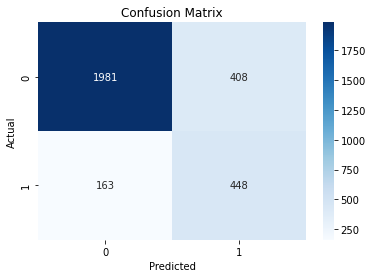

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_ranfor)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted');ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
plt.show()

## **XGBoost**

In [ ]:
clf = xgb.XGBClassifier(max_depth=4)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_train_clf = clf.predict(X_train)
y_test_clf = clf.predict(X_test)

In [ ]:
classification_eval(y_train, y_train_clf, 'XGBoost training perf')

Evaluation Model: XGBoost training perf
[[1563  219]
 [ 327 1455]]
Accuracy   : 84.68 %
Precision  : 86.92 %
Recall     : 81.65 %
Specificity: 87.71 %
NPV        : 82.7 %
F-Score    : 84.2 %


In [ ]:
classification_eval(y_test, y_test_clf, 'XGBoost Testing Perf.')

Evaluation Model: XGBoost Testing Perf.
[[1993  396]
 [ 167  444]]
Accuracy   : 81.23 %
Precision  : 52.86 %
Recall     : 72.67 %
Specificity: 83.42 %
NPV        : 92.27 %
F-Score    : 61.2 %


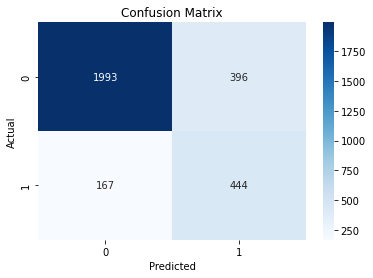

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_clf)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted');ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
plt.show()

## **Artifical Neural Network**

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dropout(.25, input_shape=(10,)))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dropout(.25, input_shape=(10,)))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dropout(.25, input_shape=(10,)))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['Recall'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 100, epochs = 200)

Epoch 1/200
36/36 [==============================] - 1s 2ms/step - loss: 0.7153 - recall: 0.8019
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6881 - recall: 0.5842
Epoch 3/200
36/36 [==============================] - 0s 2ms/step - loss: 0.6783 - recall: 0.4877
Epoch 4/200
36/36 [==============================] - 0s 2ms/step - loss: 0.6736 - recall: 0.5191
Epoch 5/200
36/36 [==============================] - 0s 2ms/step - loss: 0.6690 - recall: 0.5236
Epoch 6/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6589 - recall: 0.5253
Epoch 7/200
36/36 [==============================] - 0s 2ms/step - loss: 0.6551 - recall: 0.5887
Epoch 8/200
36/36 [==============================] - 0s 2ms/step - loss: 0.6407 - recall: 0.5875
Epoch 9/200
36/36 [==============================] - 0s 2ms/step - loss: 0.6408 - recall: 0.6246
Epoch 10/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6350 - recall: 0.6437
Epoch 11/200
36/36 [=========

In [ ]:
y_train_ann = ann.predict(X_train)
y_train_ann = [0 if i < 0.5 else 1 for i in y_train_ann]

compare = pd.DataFrame(np.array(y_train), columns=['Actual'])
compare['Predicted'] = y_train_ann

In [ ]:
y_test_ann = ann.predict(X_test)
y_test_ann = [0 if i < 0.5 else 1 for i in y_test_ann]

compare = pd.DataFrame(np.array(y_test), columns=['Actual'])
compare['Predicted'] = y_test_ann

In [ ]:
# Training Performance
classification_eval(y_train, y_train_ann, 'ANN Training Perf.')

Evaluation Model: ANN Training Perf.
[[1373  409]
 [ 332 1450]]
Accuracy   : 79.21 %
Precision  : 78.0 %
Recall     : 81.37 %
Specificity: 77.05 %
NPV        : 80.53 %
F-Score    : 79.65 %


In [ ]:
# Testing Performance
classification_eval(y_test, y_test_ann, 'ANN Testing Perf.')

Evaluation Model: ANN Testing Perf.
[[1799  590]
 [ 126  485]]
Accuracy   : 76.13 %
Precision  : 45.12 %
Recall     : 79.38 %
Specificity: 75.3 %
NPV        : 93.45 %
F-Score    : 57.54 %


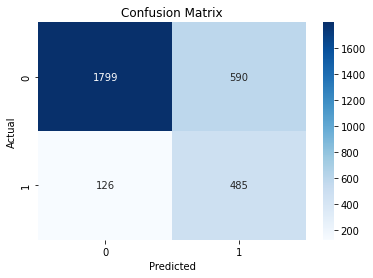

In [ ]:
cm = metrics.confusion_matrix(y_test, y_test_ann)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted');ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
plt.show()

## **Permutation Importance**

In [ ]:
!pip install eli5

     |████████████████████████████████| 106 kB 2.8 MB/s 


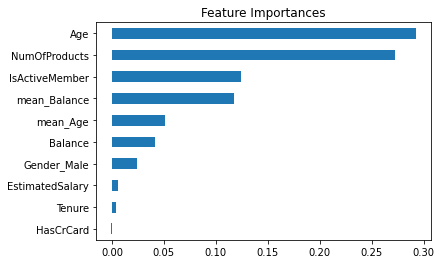

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(estimator=ann,scoring='r2', n_iter=5, random_state=27)
perm.fit (X_test, y_test)
columns= X_test.columns.to_list()
feature_importance = perm.feature_importances_
fimportance = pd.Series(feature_importance, columns).sort_values(ascending=False)

fimportance.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importances')
plt.show()